# Jobs Scheduling

In [1]:
import numpy as np
from rl_factory import rl_agent_factory # Factory to build RL agents name:string->model:rllib
from rl_factory import rl_hyperparameter_space_dict_factory
from JobScheduling.EnvScheduling import EnvScheduling, inv_prepro_state, inv_prepro_reward
from JobScheduling.AgentHeuristic import AgentFCFS_FCFS, AgentFCFS_EASY_BACKFILLING
from AgentRL import AgentRLLIB

# Environment
env_config = {"action_type": "discrete"}
env_class=EnvScheduling

## Heuristics

FCFS with FCFS backfilling

In [2]:
agent=AgentFCFS_FCFS(None, env_class, env_config, inv_prepro_state, inv_prepro_reward)

# The environment is stochastic (random shuffling of items)
ls=[agent.evaluate()['cumulated_rewards'] for i in range(30)] # ls: list_scores
m=round(np.mean(ls))
print(f"Info: {m} +- {round(np.std(ls))} min:{round(np.min(ls))} max:{round(np.max(ls))}", )

Info: -5039 +- 2807 min:-12978 max:-1142


**PID Table (1 simulation)**

Vertically time axis, horizontally ressource consumed, "0" means empty space otherwise it is the PID value consuming the resource

In [3]:
ev=agent.evaluate()
fcfsfcfs_info=agent.env.info
print(fcfsfcfs_info)

{'incoming_item': None, 'pending_items': [], 'available_resource': array([3., 3., 3., 0.]), 'round': 92, 'mean_util': 0.9086956521739131, 'max_wait': 47, 'average_wait': 14.6, 'rate_wait': 0.54, 'solution': array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [15, 15, 15,  0,  0],
       [15, 15, 15, 76, 76],
       [15, 15, 15, 76, 76],
       [76, 76, 92, 92, 92],
       [92, 92, 92, 98,  0],
       [98, 46, 46,  0,  0],
       [46, 46, 71,  8,  0],
       [71, 91, 85,  0,  0],
       [ 4,  4,  4,  0,  0],
       [ 4,  4,  4, 59, 59],
       [ 4,  4,  4, 59, 59],
       [89,  7, 53, 53, 53],
       [ 7, 53, 53, 53, 14],
       [53, 53, 53, 14, 74],
       [74, 60, 60, 60,  0],
       [60, 60, 60, 83,  0],
       [60, 60, 60, 83, 20],
       [83, 20, 68, 68, 68],
       [75, 75, 88, 88, 88],
       [87, 26, 26, 22, 22],
       [87, 26, 26, 22, 22],
       [26, 26, 45, 45, 45],
       [45, 45, 45, 23, 10],
       [45, 45, 45, 23, 10],
       [10, 96, 96, 18, 18],
       [96

FCFS with EASY backfilling

In [4]:
agent=AgentFCFS_EASY_BACKFILLING(None, env_class, env_config, inv_prepro_state, inv_prepro_reward)

# The environment is stochastic (random shuffling of items)
ls=[agent.evaluate()['cumulated_rewards'] for i in range(30)] # ls: list_scores
m=round(np.mean(ls))
print(f"Info: {m} +- {round(np.std(ls))} min:{round(np.min(ls))} max:{round(np.max(ls))}", )

Info: -19690 +- 6211 min:-36635 max:-8463


**PID Table (1 simulation)**

Vertically time axis, horizontally ressource consumed, "0" means empty space otherwise it is the PID value consuming the resource

In [5]:
ev=agent.evaluate()
fcfseasy_info=agent.env.info
print(fcfseasy_info)

{'incoming_item': None, 'pending_items': [], 'available_resource': array([3., 3., 0., 0.]), 'round': 91, 'mean_util': 0.9252747252747253, 'max_wait': 88, 'average_wait': 13.58, 'rate_wait': 0.54, 'solution': array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [15, 15, 15,  0,  0],
       [15, 15, 15, 76, 76],
       [15, 15, 15, 76, 76],
       [76, 76, 53, 53, 53],
       [53, 53, 53, 98,  0],
       [53, 53, 53, 98,  0],
       [71, 34, 34, 34,  8],
       [71, 34, 34, 34, 91],
       [34, 34, 34, 46, 46],
       [46, 46, 59, 59, 85],
       [59, 59, 99, 99, 99],
       [89,  7,  1,  1,  1],
       [ 7,  1,  1,  1, 14],
       [ 1,  1,  1, 14, 74],
       [74, 52, 52, 52,  0],
       [52, 52, 52, 83,  0],
       [83, 29, 29, 20, 10],
       [83, 29, 29, 20, 10],
       [10, 75, 75,  5,  5],
       [87, 26, 26, 18, 18],
       [87, 26, 26, 18, 18],
       [26, 26, 45, 45, 45],
       [45, 45, 45, 23,  0],
       [45, 45, 45, 23, 93],
       [96, 96, 94, 94, 94],
       [9

## Reinforcement Learning

In [6]:
rl_name = "PPO"
hyperparam_space_default_value, _ = rl_hyperparameter_space_dict_factory(rl_name)

hyperparameters = hyperparam_space_default_value.copy()
for k,v in hyperparam_space_default_value.items():
    hyperparameters[k]=v[len(v)//2]

# update value similar to the publication
hyperparameters["lr"]=1e-4
hyperparameters["deep"]=2
hyperparameters["wide"]=16
hyperparameters["train_batch_size"]=64
hyperparameters["sgd_minibatch_size"]=64
hyperparameters["lambda"]=0.99
hyperparameters["grad_clip"]=0.3
hyperparameters["num_rollout_workers"]=2

rllib_trainer = rl_agent_factory(rl_name, hyperparameters, env_class, env_config=env_config)

2023-02-06 17:40:23,192	WARNING deprecation.py:47 -- DeprecationWarning: `algo = Algorithm(env='<class 'JobScheduling.EnvScheduling.EnvScheduling'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class 'JobScheduling.EnvScheduling.EnvScheduling'>').build()` instead. This will raise an error in the future!
2023-02-06 17:40:27,619	INFO worker.py:1538 -- Started a local Ray instance.
(RolloutWorker pid=9262) 2023-02-06 17:40:34,788	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
2023-02-06 17:40:38,588	INFO trainable.py:172 -- Trainable.setup took 14.945 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-02-06 17:40:38,591	WARNING util.py:66 -- Install gputil for GPU system m

In [7]:
agent=AgentRLLIB(rllib_trainer, env_class, env_config, inv_prepro_state, inv_prepro_reward)

best_score=-np.inf
best_path=None

scores=[]
for ep in range(100):
    for it in range(100):
        agent.train()

    # The environment is stochastic (random shuffling of items)
    ls=[agent.evaluate()['cumulated_rewards'] for i in range(30)] # ls: list_scores
    m=round(np.mean(ls))
    print(f"Info: {m} +- {round(np.std(ls))} min:{round(np.min(ls))} max:{round(np.max(ls))}", )
    
    if m>=best_score:
        bes_score=m
        best_path=agent.save("/tmp/")
    
    scores.append((m,round(np.std(ls))))

Info: -10020 +- 5932 min:-25666 max:-1609
Info: -5357 +- 3735 min:-18907 max:-515
Info: -3222 +- 2207 min:-10085 max:70
Info: -2010 +- 1939 min:-7701 max:1115
Info: -1365 +- 1541 min:-6180 max:527
Info: -1707 +- 1839 min:-6710 max:610
Info: -1830 +- 2123 min:-7822 max:776
Info: -1712 +- 1844 min:-6874 max:671
Info: -2354 +- 2820 min:-11213 max:894
Info: -2262 +- 2583 min:-12382 max:624
Info: -1601 +- 1701 min:-6315 max:1173
Info: -2329 +- 2032 min:-7695 max:438
Info: -1674 +- 2249 min:-12038 max:838
Info: -1544 +- 1661 min:-6187 max:927
Info: -914 +- 1669 min:-6376 max:1189
Info: -1399 +- 1193 min:-3966 max:568
Info: -1821 +- 1544 min:-5550 max:533
Info: -1601 +- 1818 min:-6353 max:998
Info: -1757 +- 2073 min:-8024 max:705
Info: -1489 +- 1766 min:-5643 max:1072
Info: -1152 +- 1323 min:-5255 max:527
Info: -1343 +- 1370 min:-5076 max:655
Info: -1559 +- 1697 min:-6832 max:811
Info: -1515 +- 1613 min:-5224 max:1149
Info: -1460 +- 1428 min:-5508 max:455
Info: -2367 +- 1875 min:-6129 max:822

Best checkpoint

In [13]:
agent.restore(best_path)

2023-02-06 19:28:45,832	INFO trainable.py:790 -- Restored on 192.168.1.100 from checkpoint: /tmp/checkpoint_010000
2023-02-06 19:28:45,836	INFO trainable.py:799 -- Current state after restoring: {'_iteration': 10000, '_timesteps_total': None, '_time_total': 1866.2975928783417, '_episodes_total': 2702}


**PID Table**

Vertically time axis, horizontally ressource consumed, "0" means empty space otherwise it is PID value

In [14]:
ev=agent.evaluate()
rl_info=agent.env.info
print(rl_info)

{'incoming_item': None, 'pending_items': [], 'available_resource': array([0., 0., 0., 0.]), 'round': 85, 'mean_util': 0.9714285714285713, 'max_wait': 34, 'average_wait': 17.17, 'rate_wait': 0.96, 'solution': array([[ 0,  0,  0,  0,  0],
       [34, 34, 34,  0,  0],
       [34, 34, 34, 22,  0],
       [34, 34, 34, 22,  6],
       [ 6, 87, 87, 87, 30],
       [ 6, 87, 87, 87, 30],
       [87, 87, 87, 88, 88],
       [20, 20, 20, 26, 26],
       [12, 12, 12, 52, 69],
       [12, 12, 12, 52,  5],
       [64, 64, 64, 49, 49],
       [64, 64, 64, 49, 49],
       [37, 37, 37, 33, 33],
       [37, 37, 37, 33, 33],
       [83, 83, 93, 18, 84],
       [83, 83, 18, 84, 95],
       [83, 83, 18, 84, 21],
       [21, 27, 27, 27, 50],
       [27, 27, 27, 65, 65],
       [74, 74, 74, 14, 14],
       [14, 14,  2,  2,  2],
       [ 2,  2,  2, 75, 75],
       [75, 75, 41, 41, 41],
       [41, 41, 41, 72, 72],
       [72, 72, 51, 51, 51],
       [72, 72, 51, 51, 51],
       [51, 51, 51, 96, 96],
       [7

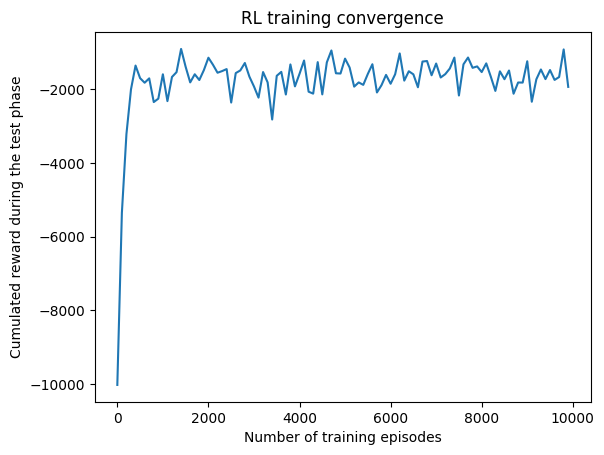

Best score:  -914


In [15]:
import numpy as np
import matplotlib.pyplot as plt
 
# Dataset
x = np.array([i*100 for i in range(len(scores))])
y = np.array([m for m,s in scores])
 
# Plotting the Graph
plt.plot(x, y)
plt.title("RL training convergence")
plt.xlabel("Number of training episodes")
plt.ylabel("Cumulated reward during the test phase")
plt.show()

print("Best score: ", np.max(np.array(scores)[:,0]))

## Comparison

Display Metric

In [16]:
methods={"FCFS_FCFS": fcfsfcfs_info, "FCFS_EASY_BACKFILLING":fcfseasy_info, "RL":rl_info}
attributes=["mean_util" , "average_wait", "rate_wait", "max_wait"]

for k,v in methods.items():
    res=", ".join([a+":"+str(round(v[a],2)) for a in attributes])
    print(k, res)

FCFS_FCFS mean_util:0.91, average_wait:14.6, rate_wait:0.54, max_wait:47
FCFS_EASY_BACKFILLING mean_util:0.93, average_wait:13.58, rate_wait:0.54, max_wait:88
RL mean_util:0.97, average_wait:17.17, rate_wait:0.96, max_wait:34


Fancy radar plot

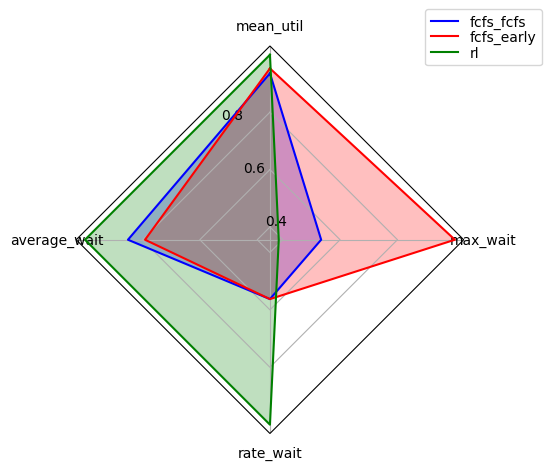

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def format_radar_data(methods, atributes):
    radar=[]
    for _, v in methods.items():
        line=[ v[a] for a in attributes]
        radar.append(line)

    # radar is M x A with M methods and A attributes
    radar=np.array(radar)
    for a in range(radar.shape[1]):
        A=radar[:,a]
        max_s=np.max(A)
        min_s=np.min(A)
        A=A/max_s
        radar[:,a]=A

    data=[
        attributes,
        ["Workload #1", radar]
    ]
    return data



N = 4
theta = radar_factory(N, frame='polygon')
title=""


data = format_radar_data(methods, attributes)
spoke_labels = data.pop(0)

fig, axs = plt.subplots(figsize=(5, 5), nrows=1, ncols=1,
                        subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g']
# Plot the four cases from the example data on separate axes
#for ax, (title, case_data) in zip(axs.flat, data):
ax=axs
ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
             horizontalalignment='center', verticalalignment='center')


for d, color in zip(data[0][1], colors):
    ax.plot(theta, d, color=color)
    ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
ax.set_varlabels(spoke_labels)

# add legend relative to top-left plot
labels = ["fcfs_fcfs", "fcfs_early", "rl"]
legend = axs.legend(labels, loc=(0.9, .95), labelspacing=0.1)


plt.show()
